UAV Position: (1, 1, 1), Goal Position: (10, 10, 10), Obstacles: [(3, 4, 2), (6, 7, 3), (4.5, 1.3, 0.8)]

Step 1:
Selected Action (Epsilon-Greedy): forward
Reward Received: 2.919109734840503
Step Reward Details: {'Ra': 2.9997088570863126, 'Rcz': 18.820526000746455, 'Rmz': 0.9330435654364173}
Updated Q-values: [0.2919109734840503, 0, 0, 0, 0, 0]

Step 2:
Selected Action (Epsilon-Greedy): forward
Reward Received: 2.948556380267439
Step Reward Details: {'Ra': 2.999894476831809, 'Rcz': 19.504056640696124, 'Rmz': 0.9845639745810186}
Updated Q-values: [0.5838475017759537, 0, 0, 0, 0, 0]

Step 3:
Selected Action (Epsilon-Greedy): forward
Reward Received: 2.9329725099741046
Step Reward Details: {'Ra': 2.9999574892280703, 'Rcz': 19.596366133023388, 'Rmz': 1.0064637162745407}
Updated Q-values: [0.8713062777556047, 0, 0, 0, 0, 0]

Step 4:
Selected Action (Epsilon-Greedy): forward
Reward Received: 2.850288631976155
Step Reward Details: {'Ra': 2.9999807626157295, 'Rcz': 18.06057513806323, 'Rmz': 0.

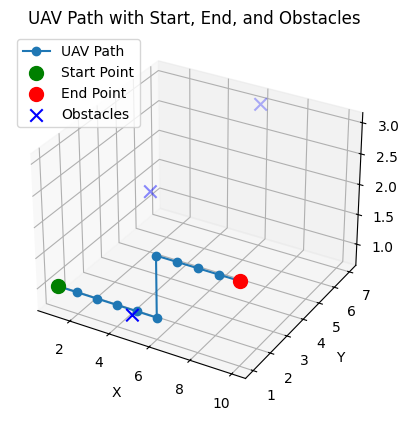

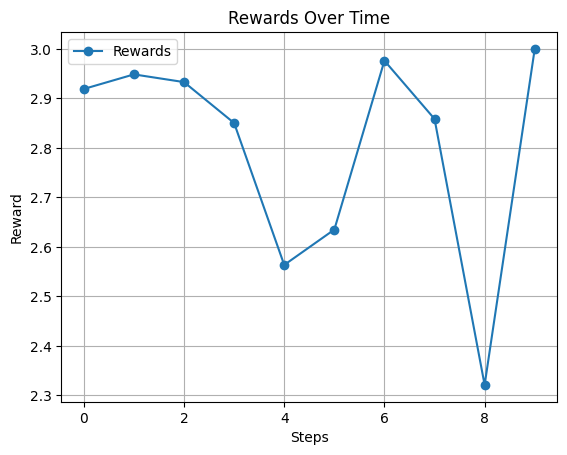

In [8]:
from evironment2 import initialize_environment, update_uav_position
from uav_dynamics1 import calculate_velocity
from reward_function2 import calculate_reward
from action_selection2 import epsilon_greedy, update_Q
from visualization4 import visualize_path
import numpy as np

# Step 1: Define input parameters
# State and action sets
S = []  # State set (can be updated dynamically during the simulation)
A = ['forward', 'backward', 'left', 'right', 'up', 'down']  # Action set

# Learning parameters
alpha = 0.1  # Step size (learning rate)
gamma = 0.9  # Decay factor (discount for future rewards)
epsilon = 0.1  # Exploration probability for epsilon-greedy
T = 10  # Number of iteration rounds (steps)

# Environment parameters
current_velocity = (0, 0, 0)  # Initial velocity
max_speed = 2.0  # Maximum speed
D_cz = 5  # Critical zone distance
D_max = 10  # Maximum effective obstacle avoidance distance
d_max = 20  # Maximum distance to the goal

# Step 2: Initialize environment
uav_pos, goal_pos, obstacles = initialize_environment()
print(f"UAV Position: {uav_pos}, Goal Position: {goal_pos}, Obstacles: {obstacles}")

# Initialize Q-values, path, and rewards
Q_values = [0 for _ in A]  # Initialize Q-values for actions in A
uav_path = [uav_pos]
rewards = []
reward_details = []  # To store Ra, Rcz, and Rmz for debugging

# Step 3: Simulation loop
for step in range(T):  # Iterate for T rounds
    print(f"\nStep {step + 1}:")
    
    # Step 3.1: Add the current state to the state set
    S.append(uav_pos)
    
    # Step 3.2: Select action using epsilon-greedy
    action = epsilon_greedy(Q_values, epsilon)
    print(f"Selected Action (Epsilon-Greedy): {A[action]}")  # Use A[action] to show the action name
    
    # Step 3.3: Update UAV dynamics (position and velocity)
    current_velocity = calculate_velocity(current_velocity, action, max_speed)
    uav_pos = update_uav_position(uav_pos, action)
    uav_path.append(uav_pos)

    # Step 3.4: Calculate reward
    total_reward = 0
    step_reward_details = {"Ra": 0, "Rcz": 0, "Rmz": 0}
    for obstacle in obstacles:  # Handle multiple obstacles
        R, Ra, Rcz, Rmz = calculate_reward(uav_pos, goal_pos, obstacle, D_cz, D_max, d_max)
        total_reward += R
        step_reward_details["Ra"] += Ra
        step_reward_details["Rcz"] += Rcz
        step_reward_details["Rmz"] += Rmz
    rewards.append(total_reward)
    reward_details.append(step_reward_details)
    print(f"Reward Received: {total_reward}")
    print(f"Step Reward Details: {step_reward_details}")

    # Step 3.5: Update Q-values
    Q_values = update_Q(Q_values, action, total_reward, alpha, gamma)
    print(f"Updated Q-values: {Q_values}")

# Step 4: Visualize path and rewards
visualize_path(uav_path, rewards, obstacles)